# K-Nearest Neighbors

In this notebook you will implement a simple K-NN algorithm and try to see the effect of using different values for the parameter k. Source for the excercise was the book of A.Géron , "Hands-On Machine Learning with Keras, Scikit & Tensorflow", O'Reilly. 
In this exercise we will work with Life satisfaction and GDP Data and we will try to predict the numerical value for Life statisfaction index of Cyprus, based on its GDP.
Add your code where indicated with "#### ADD YOUR CODE HERE#####"

The next function is just a util-function to prepare the data.

In [1]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

The module we need to import to implement the algorithm is sklearn.neighbors.
The 2 datafiles "oecd_bli_2015.csv" and "gdp_per_capita.csv" should be in the same folder as this notebook.

[[5.76666667]]


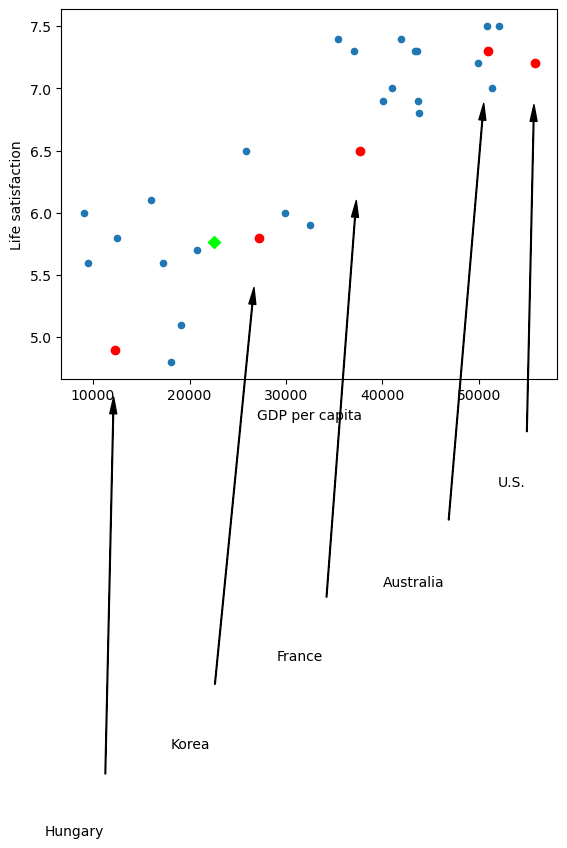

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.neighbors

# Load the data
oecd_bli = pd.read_csv("oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv("gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
position_text = {
    "Hungary": (5000, 1),
    "Korea": (18000, 1.7),
    "France": (29000, 2.4),
    "Australia": (40000, 3.0),
    "United States": (52000, 3.8),
}
for country, pos_text in position_text.items():
    pos_data_x, pos_data_y = country_stats.loc[country]
    country = "U.S." if country == "United States" else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "ro")


# Select a linear model
model = sklearn.neighbors.KNeighborsRegressor(n_neighbors = 3)

#choose the right function for KNN!!! Are we dealing with regression or classification?
#In this case we are dealing with a regression task (because our target variable, the life Statisfaction Index take continious values
#, therefore we need to use KNeighborsRegressor


# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
print(model.predict(X_new)) 

plt.plot(X_new, model.predict(X_new), 'D', color='lime')
plt.show()

Try now to change the number of neighbors on which your prediction is based. Consider for example the extremes cases of n_neighbors = 1 or 25. 

How does the prediction for Cyprus chage wrt to n_neighbors (=k)?
Can you guess why?

##### Answer:
With k = 1, the Life Satisfaction Index for Cyprus = 5.7, with k=25 it is higher: 6.3
With a small value for k, the predicted value is mainly influenced by the closes points (z.B Korea), when k increases the higher valued of life sastifaction will enter the computation, contributing to increase the average -> that is why we get a higher predicted value for k = 25